# Counting Steps from Accelerometer Data


## Theoretical Overview

The Empatica E4 wristband is a "wearable wireless device designed for continuous, real-
time data acquisition in daily life." It provides Blood Volume Pulse (BVP), Heart Rate
Variability (HRV), a 3-axis Accelerometer, an Electrodermal Activity (EDA) sensor, and skin
temperature. From these data sources, we can create an unlimited number of applications.
But first, we need to learn how to use the device!
In this lab, you will learn how to record data from the device, upload it to Empatica
Connect, then download the raw data (CSV format), then import it via Python for process-
ing. Then you will see how to count your steps using the data you collected.

## Python Libraries

These libraries will help with the processing and computation of your data.

In [28]:
#IPython is what you are using now to run the notebook
import IPython
print "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__

# Numpy is a library for working with Arrays
import numpy as np
print "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__

# SciPy implements many different numerical algorithms
import scipy as sp
print "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__

# Pandas makes working with data tables easier
import pandas as pd
print "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__

# Module for plotting
import matplotlib
print "Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__

IPython version:       3.0.0 (need at least 1.0)
Numpy version:        1.11.1 (need at least 1.7.1)
SciPy version:        0.16.0 (need at least 0.12.0)
Pandas version:       0.17.0 (need at least 0.11.0)
Mapltolib version:     1.5.1 (need at least 1.2.1)
Scikit-Learn version: 0.17.1 (need at least 0.13.1)


If any of these libraries are missing or out of date, you will need to [install them](https://github.com/cs109/content/wiki/Installing-Python#installing-additional-libraries) and restart IPython

## Data Collection Procedure


Go to the Empatica E4 Get Started page. Follow the directions to set up the device. Once
you've set up the device, practice collecting data. It does not matter if you stream the
data to your mobile device, or store the data to the device itself for later retrieval (although
streaming to your phone is a bit easier). Once you have practiced collecting data, collect
data for the following scenarios:

### Resting

Collect data for at least 30 seconds while at rest. Similar to
how your arm rests while measuring your blood pressure, you
should rest your arm while you perform the recording. Make
sure to rest 15 seconds prior to recording to make sure your
heart beat has returned to baseline.

### Constrained Walking 

Next, you will want to collect at least 30 seconds of data while
walking. When you walk, make sure to place your open hand
(the one that has the band on it) against your chest and take
normal, regular steps. Make sure you have enough room so
that you can be consistent.

### Verify

Now that you've completed your data acquisition, make sure
to take a look at the data! Quickly look at the Empatica
Dashboard and make sure your data was properly stored.

## Processing the Data with Python

### Plot the Accelerometer Data

Plot the accelerometer data side by side for the resting and constrained walking, respectively. What do
you notice? Can you "see" the steps?
Turns out the way a Fitbit/Jawbone/etc activity tracker
tracks your steps is by looking at the magnitude of your acceleration and then applying a peakfnder to it to detect peaks of
magnitude. That's why shaking your wrist is an effective way
to cheat it: it doesn't discriminate in which direction the acceleration is coming from. Using the accelerometer data, we can find
the magnitude of acceleration for each of the datasets.

After you've collected and downloaded the data, rename the folders of data with corresponding names `Resting` and `Steps`. Upload the two folders under the `Data` folder in the server and run the following cells.

#### Resting

Populating the interactive namespace from numpy and matplotlib


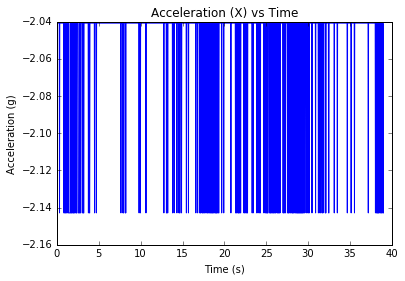

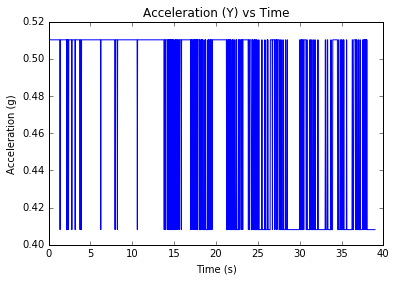

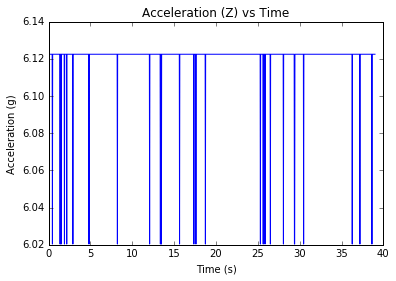

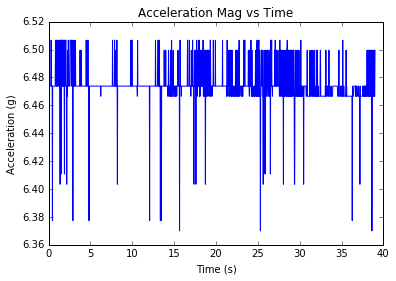

In [33]:
%pylab inline
%matplotlib inline

Fs = 32
ACC = pd.read_csv('Data/Resting/ACC.csv',sep=',',dtype=float64,skiprows=50)/9.8
ACC_x = ACC.values[:,0]
ACC_y = ACC.values[:,1]
ACC_z = ACC.values[:,2]

ACC_stop = (len(ACC)/Fs)
ACC_time =np.linspace(0, ACC_stop , len(ACC))

figure(1);
plot(ACC_time,ACC_x);
xlabel('Time (s)'); ylabel('Acceleration (g)');
title('Acceleration (X) vs Time');

figure(2);
plot(ACC_time,ACC_y);
xlabel('Time (s)'); ylabel('Acceleration (g)');
title('Acceleration (Y) vs Time');

figure(3);
plot(ACC_time,ACC_z);
xlabel('Time (s)'); ylabel('Acceleration (g)');
title('Acceleration (Z) vs Time');


ACC_mag_walking=sqrt(ACC_x**2+ACC_y**2+ACC_z**2);
ACC_mag_walking = ACC_mag_walking.reshape([len(ACC_mag_walking),])
figure(4);
plot(ACC_time,ACC_mag_walking);
xlabel('Time (s)'); ylabel('Acceleration (g)');
title('Acceleration Mag vs Time');

#### Constrained Walking

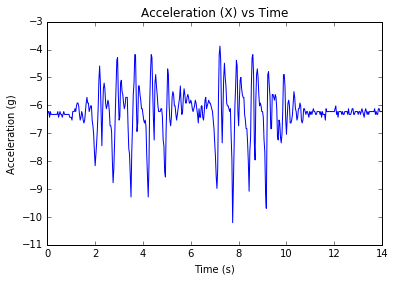

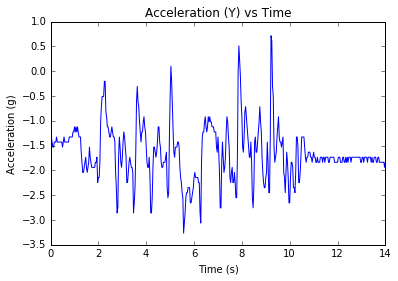

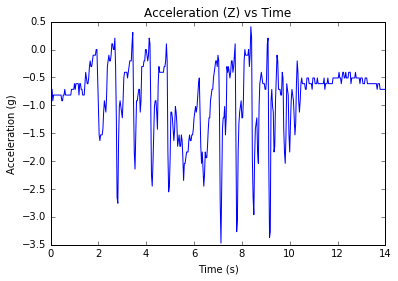

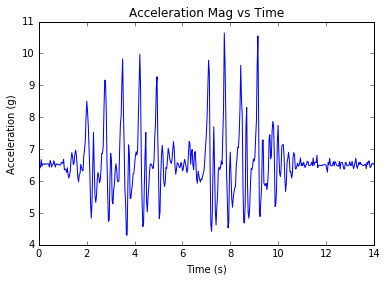

In [34]:
Fs = 32
ACC = pd.read_csv('Data/Steps/ACC.csv',sep=',',dtype=float64,skiprows=50)/9.8
ACC_x = ACC.values[:,0]
ACC_y = ACC.values[:,1]
ACC_z = ACC.values[:,2]

ACC_stop = (len(ACC)/Fs)
ACC_time =np.linspace(0, ACC_stop , len(ACC))

figure(1);
plot(ACC_time,ACC_x);
xlabel('Time (s)'); ylabel('Acceleration (g)');
title('Acceleration (X) vs Time');

figure(2);
plot(ACC_time,ACC_y);
xlabel('Time (s)'); ylabel('Acceleration (g)');
title('Acceleration (Y) vs Time');

figure(3);
plot(ACC_time,ACC_z);
xlabel('Time (s)'); ylabel('Acceleration (g)');
title('Acceleration (Z) vs Time');


ACC_mag_walking=sqrt(ACC_x**2+ACC_y**2+ACC_z**2);
ACC_mag_walking = ACC_mag_walking.reshape([len(ACC_mag_walking),])
figure(4);
plot(ACC_time,ACC_mag_walking);
xlabel('Time (s)'); ylabel('Acceleration (g)');
title('Acceleration Mag vs Time');

#### Step 1: Peakfinder

Using a peakfinder, we can plot the magnitude with red dots at the peaks denoting steps.

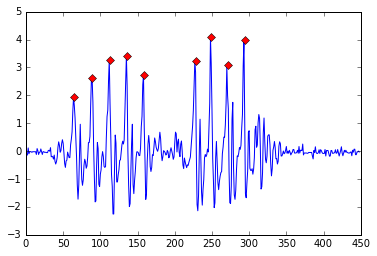

In [35]:
ACC_mean = mean(ACC_mag_walking, axis=0)
ACC_mag_walking = ACC_mag_walking-ACC_mean

figure(2)
import numpy as np
import peakutils
from peakutils.peak import indexes
xs = np.arange(1, len(ACC_mag_walking))
indexes = indexes(np.array(ACC_mag_walking), thres=1.0/max(ACC_mag_walking), min_dist=20)
plot(ACC_mag_walking)
plot(xs[indexes], ACC_mag_walking[indexes], 'rD')
plt.show()

#### Step 2: Step Counting

After finding the peaks, counting steps is as simple as summing up the number of peaks.

In [32]:
n_steps = len(indexes)
print "Total number of steps is: ", n_steps

Total number of steps is:  9
